In [292]:
import yfinance as yf
import pandas as pd

In [293]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500 = sp500.loc["1990-01-01":].copy()
del sp500["Dividends"]
del sp500["Stock Splits"]

In [294]:
sp500.index

DatetimeIndex(['1990-01-02 00:00:00-05:00', '1990-01-03 00:00:00-05:00',
               '1990-01-04 00:00:00-05:00', '1990-01-05 00:00:00-05:00',
               '1990-01-08 00:00:00-05:00', '1990-01-09 00:00:00-05:00',
               '1990-01-10 00:00:00-05:00', '1990-01-11 00:00:00-05:00',
               '1990-01-12 00:00:00-05:00', '1990-01-15 00:00:00-05:00',
               ...
               '2024-04-18 00:00:00-04:00', '2024-04-19 00:00:00-04:00',
               '2024-04-22 00:00:00-04:00', '2024-04-23 00:00:00-04:00',
               '2024-04-24 00:00:00-04:00', '2024-04-25 00:00:00-04:00',
               '2024-04-26 00:00:00-04:00', '2024-04-29 00:00:00-04:00',
               '2024-04-30 00:00:00-04:00', '2024-05-01 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=8649, freq=None)

<Axes: xlabel='Date'>

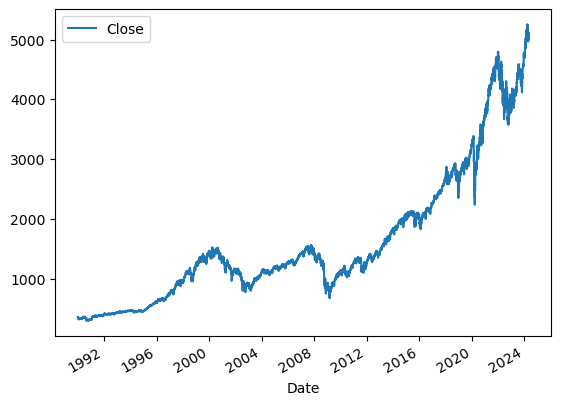

In [295]:
sp500.plot(y="Close", use_index=True)

### Target for ML model: will the price go up or down?

In [296]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995
...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941


In [297]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961,1
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922,1
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941,0


In [298]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-110]
test = sp500.iloc[-110:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [299]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
precision_score(test["Target"], preds)

0.6

,Target,0
Date,,
2023-11-22 00:00:00-05:00,1,1
2023-11-24 00:00:00-05:00,0,0
2023-11-27 00:00:00-05:00,1,1
2023-11-28 00:00:00-05:00,0,1
2023-11-29 00:00:00-05:00,1,1
...,...,...
2024-04-25 00:00:00-04:00,1,0
2024-04-26 00:00:00-04:00,1,0
2024-04-29 00:00:00-04:00,0,0


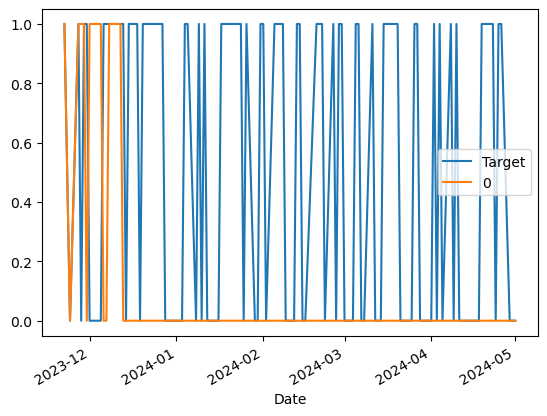

In [300]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()
combined

## Backtesting

In [301]:
def predict(train, test, predictors, model) :
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined
    

In [302]:
def backtest(data, model, predictors, start = 2500, step = 250) :
   all_predictions = []

   for i in range(start,data.shape[0], step):
      train = data.iloc[0:i].copy()
      test = data.iloc[i:(i+step)].copy()
      predictions = predict(train, test, predictors, model)
      all_predictions.append(predictions)
   return pd.concat(all_predictions)

In [303]:
predictions = backtest(sp500, model, predictors)

In [304]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

## Adding horizons and new predictors to the model

In [305]:
horizons = [ 2,5, 60, 250, 1000]
new_predictors = []

for horizon in horizons :
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_Column_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [312]:
sp500 = sp500.dropna()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_Column_2,Close_Ratio_5,Trend_Column_5,Close_Ratio_60,Trend_Column_60,Close_Ratio_250,Trend_Column_250,Close_Ratio_1000,Trend_Column_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961,1,0.997707,1.0,1.002927,3.0,0.990795,30.0,1.096950,136.0,1.220477,530.0
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922,1,1.005079,1.0,1.007851,4.0,1.000078,31.0,1.107254,136.0,1.232267,531.0
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941,0,1.001587,2.0,1.006853,4.0,1.002569,31.0,1.109859,137.0,1.235516,531.0


In [307]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [308]:

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [313]:
predictions = backtest(sp500, model, new_predictors)

In [314]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5731414868105515

<Axes: xlabel='Date'>

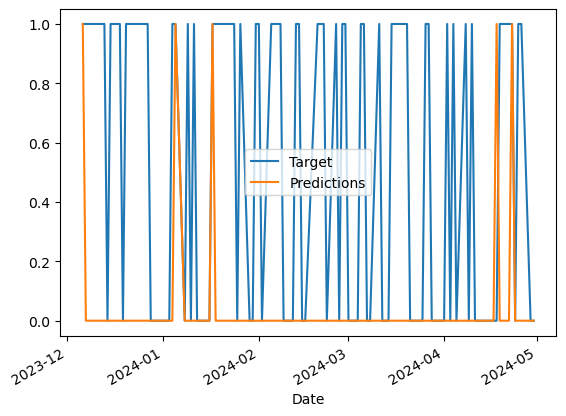

In [322]:
predictions[-100:].plot()